In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Charger ce dataset.

In [ ]:
df = pd.read_csv("./winequality.csv")
pd.read_sql_table("winequality", con="")

In [23]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 2. Informations sur le dataset
Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.).


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [28]:
df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [30]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [32]:
target = "quality"

In [34]:
X = df.drop(target, axis=1)
y = df[target]

# 3. Analyse exploratoire
Procéder à une étude exploratoire de ce dataset : étude individuelle des différentes variables, puis étude conjointe avec la variable 'quality'.


In [20]:
df[df.isna().any(axis=1)] # Afficher toutes les lignes contenant au moins un NaN ou Null

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [22]:
df_corr = df
le = LabelEncoder()
df_corr['type'] = le.fit_transform(df_corr['type'])

<Axes: >

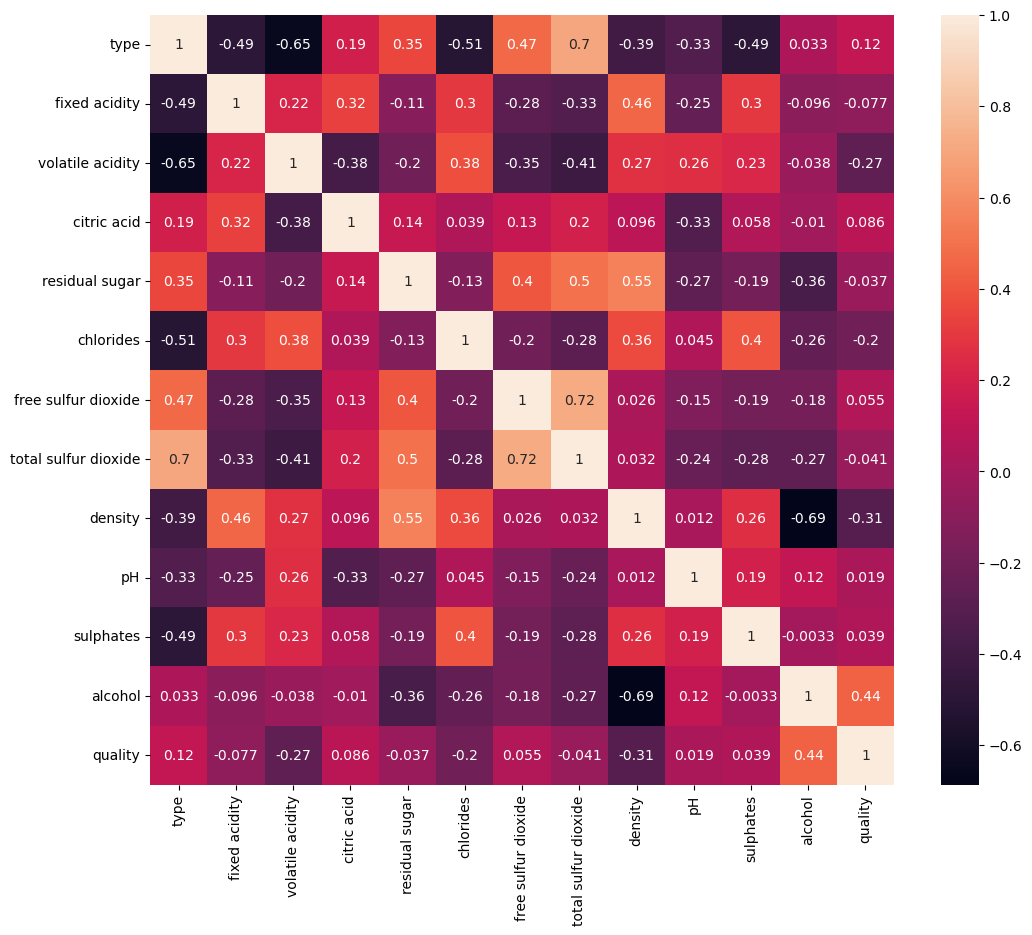

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(method="pearson"), annot=True)

# 4. Création des jeux de données
Séparer le dataset en un jeu d'entraînement/validation et un jeu de test.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

```
X       : ##########
X_train : ######
X_val   :       ##
X_test   :         ##
```

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [61]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3897, 12)
(1300, 12)
(1300, 12)
(3897,)
(1300,)
(1300,)


# 5. Prétraitement des données

In [63]:
# On normalise la sortie pour aider le modèle.
# Il faudra alors utiliser la fonction sigmoïde (logistique) comme fonction d'activation dans la couche de sortie (valeurs entre 0 et 1)
y_train_clean = y_train/10
y_val_clean = y_val/10
y_test_clean = y_test/10

In [65]:
cat_cols = ["type"]
cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", sparse_output=False))
])

In [67]:
num_cols = list(X.columns[1:])
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer()),
    ("scale", MinMaxScaler())
])

In [69]:
preprocessor = ColumnTransformer(transformers=[
    ("categorical", cat_pipeline, cat_cols),
    ("numerical", num_pipeline, num_cols),
])

In [71]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['type']),
                                ('numerical',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', MinMaxScaler())]),
                                 ['fixed acidity', 'volatile acidity',
                                  'citric acid', 'residual sugar', 'chlorides',
                                  'free sulfur dioxide', 'total sulfur dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol'])])

In [73]:
X_train_clean = preprocessor.fit_transform(X_train)
X_val_clean = preprocessor.transform(X_val)
X_test_clean = preprocessor.transform(X_test)

In [75]:
print(X_train_clean.shape)
print(X_val_clean.shape)
print(X_test_clean.shape)
print(y_train_clean.shape)
print(y_val_clean.shape)
print(y_test_clean.shape)

(3897, 12)
(1300, 12)
(1300, 12)
(3897,)
(1300,)
(1300,)


In [77]:
# Sauvegarde des données nettoyées
import pickle
# ...

# 6. Réseau dense
Implémenter un réseau de neurones avec Keras pour résoudre ce problème de régression. L'entraîner et mesurer sa performance. Essayer plusieurs modèles en changeant les hyperparamètres : fonctions d'activation, nombre de couches cachées, nombre de neurones par couche, etc.

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [82]:
num_inputs = X_train_clean.shape[1]
input_shape = (num_inputs, )

In [84]:
def create_model():
  model = Sequential()

  # Entrée du modèle
  model.add(Input(shape=input_shape))

  # Couches cachées
  model.add(Dense(20, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="relu"))

  # Couche de sortie
  model.add(Dense(1, activation="sigmoid"))

  # Compilation du modèle
  model.compile(optimizer="adam", loss="mae", metrics=["mae", "mse"])

  return model

In [60]:
model_nn = create_model()

In [62]:
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731 (6.76 KB)

 Trainable params: 1,731 (6.76 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
epochs=300

In [66]:
from keras.callbacks import EarlyStopping, BackupAndRestore


In [37]:
history = model_nn.fit(
    X_train_clean,
    y_train_clean,
    epochs=epochs,
    batch_size=20, # Le nombre d'observations à traiter avant de mettre à jour les poids
    validation_data=(X_val_clean, y_val_clean), # Le modèle va s'évaluer au cours de son entrainement sur ces données
    callbacks=[EarlyStopping(patience=20)]
)

Epoch 1/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0674 - mae: 0.0674 - mse: 0.0077 - val_loss: 0.0592 - val_mae: 0.0592 - val_mse: 0.0061
Epoch 2/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0599 - mae: 0.0599 - mse: 0.0062 - val_loss: 0.0564 - val_mae: 0.0564 - val_mse: 0.0057
Epoch 3/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0573 - mae: 0.0573 - mse: 0.0059 - val_loss: 0.0567 - val_mae: 0.0567 - val_mse: 0.0060
Epoch 4/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0561 - mae: 0.0561 - mse: 0.0058 - val_loss: 0.0543 - val_mae: 0.0543 - val_mse: 0.0056
Epoch 5/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0551 - mae: 0.0551 - mse: 0.0056 - val_loss: 0.0534 - val_mae: 0.0534 - val_mse: 0.0055
Epoch 6/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543 - mae: 0.0543 - mse: 0.0056 - val_loss: 0.0530 - val_mae: 0.0530 - val_mse: 0.0055
Epoch 7/300
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0541 - mae: 0.0541 - mse: 0.005

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="mae", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_mae", ax=axes[1], color = "orange")
    # axes.legend()

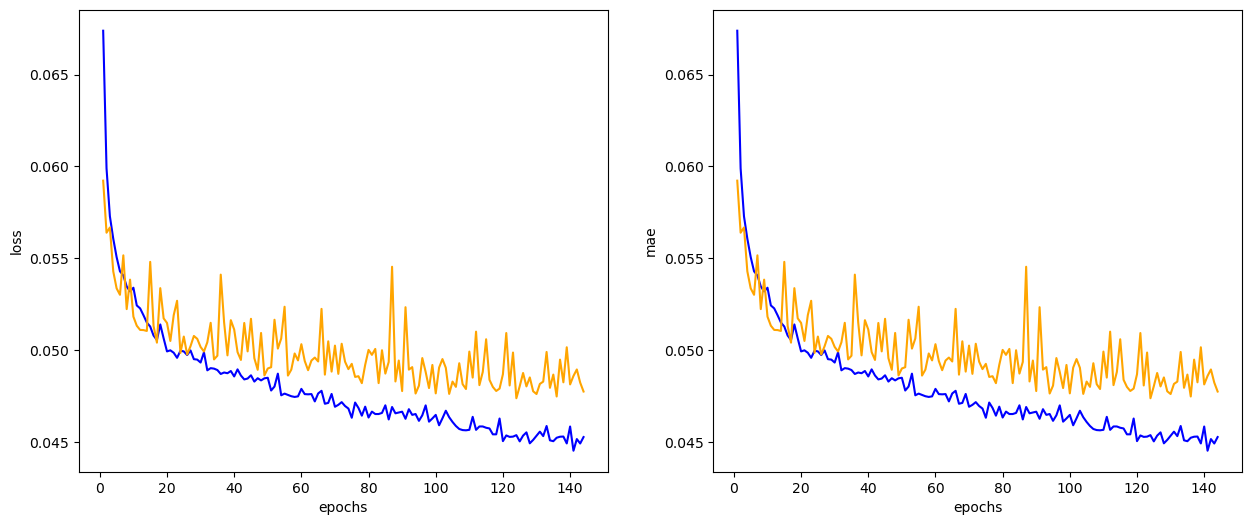

In [39]:
plot_history(history)

In [40]:
model_nn.evaluate(X_test_clean, y_test_clean)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 - mae: 0.0494 - mse: 0.0055  


[0.04942525550723076, 0.04942525550723076, 0.005543566308915615]

In [41]:
y_pred = model_nn.predict(X_test_clean)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
y_pred_scaled = y_pred*10
df_y_pred_score = pd.DataFrame(y_pred_scaled.round())
df_y_pred_score

,0
0,6.0
1,6.0
2,6.0
3,6.0
4,6.0
...,...
1295,6.0
1296,6.0
1297,6.0
1298,6.0


In [43]:
y_test.iloc[0]

6

In [44]:
df_y_real_score = pd.DataFrame(y_test_clean)

In [45]:
df_test_diff = pd.DataFrame(X_test_clean)
df_test_diff.insert(12,'predicted_score',df_y_pred_score[0])
df_test_diff.insert(13,'real_score',df_y_real_score.reset_index().drop(columns=['index'])*10)

In [46]:
df_test_diff

,0,1,2,3,4,5,6,7,8,9,10,11,predicted_score,real_score
0,1.0,0.205128,0.106667,0.235772,0.200920,0.038397,0.180556,0.294931,0.165028,0.348837,0.089888,0.433333,6.0,6.0
1,0.0,0.128205,0.226667,0.219512,0.021472,0.133556,0.076389,0.112903,0.146520,0.821705,0.235955,0.716667,6.0,7.0
2,1.0,0.256410,0.140000,0.333333,0.110429,0.056761,0.177083,0.380184,0.159244,0.310078,0.162921,0.266667,6.0,5.0
3,1.0,0.384615,0.100000,0.398374,0.110429,0.038397,0.072917,0.205069,0.123193,0.248062,0.067416,0.666667,6.0,6.0
4,1.0,0.188034,0.060000,0.227642,0.029141,0.026711,0.072917,0.211982,0.069597,0.341085,0.084270,0.516667,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1.0,0.230769,0.100000,0.243902,0.061350,0.080134,0.097222,0.341014,0.083092,0.395349,0.151685,0.700000,6.0,8.0
1296,1.0,0.273504,0.126667,0.219512,0.150307,0.048414,0.086806,0.248848,0.120301,0.248062,0.168539,0.583333,6.0,7.0
1297,1.0,0.230769,0.093333,0.300813,0.226994,0.038397,0.211806,0.338710,0.218623,0.232558,0.101124,0.216667,6.0,5.0
1298,1.0,0.358974,0.060000,0.357724,0.207055,0.068447,0.145833,0.320276,0.260073,0.434109,0.297753,0.133333,6.0,8.0


In [47]:
df_test_diff[df_test_diff['predicted_score'] != df_test_diff['real_score']]

,0,1,2,3,4,5,6,7,8,9,10,11,predicted_score,real_score
1,0.0,0.128205,0.226667,0.219512,0.021472,0.133556,0.076389,0.112903,0.146520,0.821705,0.235955,0.716667,6.0,7.0
2,1.0,0.256410,0.140000,0.333333,0.110429,0.056761,0.177083,0.380184,0.159244,0.310078,0.162921,0.266667,6.0,5.0
4,1.0,0.188034,0.060000,0.227642,0.029141,0.026711,0.072917,0.211982,0.069597,0.341085,0.084270,0.516667,6.0,7.0
5,1.0,0.350427,0.193333,0.260163,0.015337,0.046745,0.107639,0.368664,0.094274,0.217054,0.185393,0.550000,6.0,7.0
10,1.0,0.170940,0.086667,0.227642,0.061350,0.068447,0.135417,0.444700,0.179102,0.775194,0.269663,0.333333,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1.0,0.247863,0.193333,0.227642,0.019939,0.020033,0.218750,0.230415,0.054367,0.565891,0.213483,0.766667,7.0,8.0
1295,1.0,0.230769,0.100000,0.243902,0.061350,0.080134,0.097222,0.341014,0.083092,0.395349,0.151685,0.700000,6.0,8.0
1296,1.0,0.273504,0.126667,0.219512,0.150307,0.048414,0.086806,0.248848,0.120301,0.248062,0.168539,0.583333,6.0,7.0
1297,1.0,0.230769,0.093333,0.300813,0.226994,0.038397,0.211806,0.338710,0.218623,0.232558,0.101124,0.216667,6.0,5.0


# Bonus : validation croisée

Source : https://stackoverflow.com/questions/48085182/cross-validation-in-keras

In [49]:
from sklearn.model_selection import KFold

In [50]:
# On définit une fonction pour entrainer le modèle sur un jeu d'entrainement donné et l'évaluer sur un jeu d'évaluation
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
  history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_val, y_val)
)


In [51]:
# Validation croisée :
# On itère sur les découpages générés par le KFold et on fait appel à la fonction
 # Attention : y_train_clean étant un pandas DataFrame, on ne peut accéder directement aux lignes correspondantes directement avec une liste d'indices.
 # Il faut le convertir en array d'abord avec .values
 # Le même modèle va ici s'entraîner et s'évaluer successivement sur les jeux créés par la validation croisée.
 # Ex: 10 époques sur le premier bloc, puis évaluation sur le jeu correpondant
 # Puis 10 époques sur le 2e, ...
kfold = KFold(3)
model = create_model()
for ind_train, ind_val in kfold.split(X_train_clean, y_train_clean):
  train_and_evaluate(
      model,
      X_train_clean[ind_train],
      y_train_clean.values[ind_train],
      X_train_clean[ind_val],
      y_train_clean.values[ind_val]
  )

Epoch 1/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0708 - mae: 0.0708 - mse: 0.0085 - val_loss: 0.0629 - val_mae: 0.0629 - val_mse: 0.0069
Epoch 2/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0634 - mae: 0.0634 - mse: 0.0070 - val_loss: 0.0604 - val_mae: 0.0604 - val_mse: 0.0061
Epoch 3/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0611 - mae: 0.0611 - mse: 0.0062 - val_loss: 0.0574 - val_mae: 0.0574 - val_mse: 0.0056
Epoch 4/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0593 - mae: 0.0593 - mse: 0.0059 - val_loss: 0.0567 - val_mae: 0.0567 - val_mse: 0.0056
Epoch 5/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0574 - mae: 0.0574 - mse: 0.0057 - val_loss: 0.0551 - val_mae: 0.0551 - val_mse: 0.0053
Epoch 6/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0571 - mae: 0.0571 - mse: 0.0058 - val_loss: 0.0548 - val_mae: 0.0548 - val_mse: 0.0052
Epoch 7/300
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0561 - mae: 0.0561 - mse: 0.0056 - val_loss: 

KeyboardInterrupt: 

# Bonus : sauvegarder et charger un modèle

In [ ]:
model_nn.save("./model_nn.keras")

In [ ]:
from tensorflow.keras.saving import load_model
model_nn_2 = load_model("./model_nn.keras")

In [ ]:
model_nn_2.summary()

# Modèle pour Classification (J3)

In [154]:
def create_model_cat(): # Même principe que pour la regression
  model = Sequential()

  # Entrée du modèle
  model.add(Input(shape=input_shape))

  # Couches cachées
  model.add(Dense(20, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="relu"))

  # Couche de sortie
  model.add(Dense(11, activation="softmax"))

  # Compilation du modèle
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [156]:
model_cat = create_model_cat()

In [158]:
model_cat.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,841 (7.19 KB)

 Trainable params: 1,841 (7.19 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
"""
from sklearn.preprocessing import OneHotEncoder

ohencoder = OneHotEncoder()

df_y_val = pd.DataFrame(y_val)

print(ohencoder.fit_transform(df_y_val))
#y_val # On convertit la sortie attendue en matrice
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\n\nohencoder = OneHotEncoder()\n\ndf_y_val = pd.DataFrame(y_val)\n\nprint(ohencoder.fit_transform(df_y_val))\n#y_val # On convertit la sortie attendue en matrice\n'

In [162]:
from tensorflow.keras.utils import to_categorical

In [192]:
y_val_cat = to_categorical(y_val, num_classes=11) # Conversion type OneHot encoder vers une matrice à la taille personnalisable
#y_val_cat.shape
y_train_cat = to_categorical(y_train, num_classes=11)
y_test_cat = to_categorical(y_test, num_classes=11)

In [167]:
epochs = 200

In [169]:
history = model_cat.fit(
    X_train_clean,
    y_train_cat,
    epochs=epochs,
    batch_size=20, # Le nombre d'observations à traiter avant de mettre à jour les poids
    validation_data=(X_val_clean, y_val_cat) # Le modèle va s'évaluer au cours de son entrainement sur ces données
)

Epoch 1/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3877 - loss: 1.5912 - val_accuracy: 0.4900 - val_loss: 1.2322
Epoch 2/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4811 - loss: 1.2301 - val_accuracy: 0.5338 - val_loss: 1.1523
Epoch 3/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5137 - loss: 1.1546 - val_accuracy: 0.5238 - val_loss: 1.1173
Epoch 4/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5171 - loss: 1.1262 - val_accuracy: 0.5538 - val_loss: 1.1086
Epoch 5/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5330 - loss: 1.1115 - val_accuracy: 0.5192 - val_loss: 1.1155
Epoch 6/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5361 - loss: 1.1053 - val_accuracy: 0.5462 - val_loss: 1.1087
Epoch 7/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5327 - loss: 1.1013 - val_accuracy: 0.5554 - val_loss: 1.1042
Epoch 8/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5332 - loss: 1.0916 - val_accu

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_history_cat(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="accuracy", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_accuracy", ax=axes[1], color = "orange")
    # axes.legend()

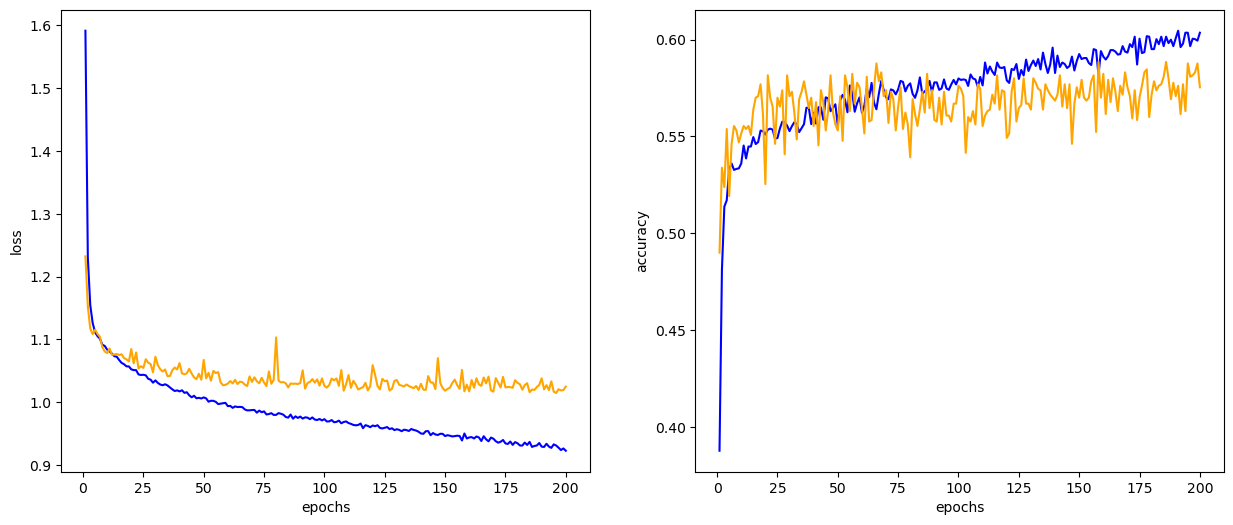

In [190]:
plot_history_cat(history)

In [194]:
model_cat.evaluate(X_test_clean,y_test_cat)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5508 - loss: 1.0485  


[1.0485115051269531, 0.5507692098617554]

In [186]:
df_result_cat = pd.DataFrame(model_cat.predict(X_test_clean))

df_result_cat

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


,0,1,2,3,4,5,6,7,8,9,10
0,5.676902e-14,4.135761e-14,5.072753e-14,0.002174,0.004158,0.217979,0.598775,0.156139,0.020762,1.263481e-05,5.780310e-13
1,2.098699e-15,1.186094e-15,2.677394e-15,0.002614,0.017092,0.230536,0.662234,0.087194,0.000329,8.649816e-08,2.013940e-14
2,3.683146e-19,2.918035e-19,4.901893e-19,0.001158,0.005084,0.538091,0.434875,0.020734,0.000058,5.812913e-10,1.839387e-17
3,5.262268e-12,2.879704e-12,4.396564e-12,0.003587,0.010508,0.112116,0.621695,0.232476,0.019546,7.177625e-05,1.828470e-11
4,1.484705e-13,7.484098e-14,1.038553e-13,0.001026,0.008087,0.208267,0.555625,0.208381,0.018588,2.528559e-05,8.407431e-13
...,...,...,...,...,...,...,...,...,...,...,...
1295,2.162631e-11,1.458249e-11,1.765613e-11,0.002492,0.003400,0.085667,0.472141,0.289290,0.146190,8.212459e-04,9.055483e-11
1296,5.492665e-13,2.938442e-13,4.911980e-13,0.001800,0.005728,0.101036,0.643881,0.225956,0.021553,4.609273e-05,2.537371e-12
1297,1.452086e-19,1.133235e-19,2.070842e-19,0.001091,0.003153,0.402836,0.565100,0.027730,0.000090,7.931302e-10,7.561318e-18
1298,4.296796e-19,2.457738e-19,7.191525e-19,0.000458,0.001379,0.091875,0.785521,0.120336,0.000431,1.703663e-08,1.044192e-17


# Bonus : Utilisation d'un GridSearchCV

La classe KerasRegressor (etKerasClassifier) sont des wrappers pour rendre compatibles le GridSearchCV et les modèles Keras.

Il faut installer scikeras pour les utiliser.

Si vous avvez le message d'erreur AttributeError: 'super' object has no attribute 'sklearn_tags' lors du grid.fit, il faut utiliser 

la version suivante de scikitlearn : !pip install scikit-learn==1.5.2

C'est le cas sur GoogleColab par exemple.

In [76]:
# !pip install scikeras
# !pip install scikit-learn==1.5.2

In [70]:
def create_model_custom(
    nb_hidden_layers=3,
    nb_neurons=20,
    activation="relu",
    optimizer="adam",
    loss="mae"
):
  model = Sequential()

  # Entrée du modèle
  model.add(Input(shape=input_shape))

  # Couches cachées
  for layer in range(nb_hidden_layers):
    model.add(Dense(nb_neurons, activation=activation))

  # Couche de sortie
  model.add(Dense(1, activation="sigmoid"))

  # Compilation du modèle
  model.compile(optimizer=optimizer, loss=loss, metrics=["mae", "mse"])

  return model

In [72]:
from scikeras.wrappers import KerasRegressor

In [74]:
model_ks = KerasRegressor(model=create_model_custom, epochs=200, batch_size=20)

In [76]:
from sklearn.model_selection import GridSearchCV

Pour définir les hyperparamètres, penser à ajouter model__ en préfixe des noms des variables :

In [79]:
hyperparameters = {
    "model__nb_hidden_layers": [3, 5, 10],
    "model__activation": ["relu", "sigmoid", "tanh"],
    "model__nb_neurons": [5, 10, 20],
    "model__optimizer": ["rmsprop", "adam"],
    "model__loss": ["mae", "mse"]
}

In [ ]:
grid = GridSearchCV(estimator=model_ks, param_grid=hyperparameters, cv=5)
grid.fit(X_train_clean, y_train_clean)

Epoch 1/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0694 - mae: 0.0694 - mse: 0.0081 
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0660 - mae: 0.0660 - mse: 0.0076
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0652 - mae: 0.0652 - mse: 0.0074
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0647 - mae: 0.0647 - mse: 0.0072
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0642 - mae: 0.0642 - mse: 0.0070
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0636 - mae: 0.0636 - mse: 0.0069
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0629 - mae: 0.0629 - mse: 0.0066
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0620 - mae: 0.0620 - mse: 0.0064
Epoch 9/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0609 - mae: 0.0609 - mse: 0.0062
Epoch 10/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0597 - mae: 0.0597 - mse: 0.0060
Epoch 11/200
156/156 ━━━━━━━━━━━━━━━━━

### On peut dump / sauvegarder les données avec pickle (corps nichons)

# Fusion des classes (J3)

In [326]:
# On modifie le dataset pour inclure les catégories
X_fus = df

X_fus.loc[X_fus['quality'] < 6, 'quality'] = 1
X_fus.loc[X_fus['quality'] == 6, 'quality'] = 2
X_fus.loc[X_fus['quality'] > 6, 'quality'] = 3

y_fus = X_fus['quality']
X_fus = X_fus.drop(columns=['quality'])

In [328]:
y_fus

0       2
1       2
2       2
3       2
4       2
       ..
6492    1
6493    2
6494    2
6495    1
6496    2
Name: quality, Length: 6497, dtype: int64

In [384]:
X_fus_train, X_fus_test, y_fus_train, y_fus_test = train_test_split(X_fus, y_fus, test_size=0.2, random_state=1)
X_fus_train, X_fus_val, y_fus_train, y_fus_val = train_test_split(X_fus_train, y_fus_train, test_size=0.25, random_state=1)

In [386]:
# Normaliser X
X_fus_train_clean = preprocessor.fit_transform(X_fus_train)
X_fus_val_clean = preprocessor.transform(X_fus_val)
X_fus_test_clean = preprocessor.transform(X_fus_test)

In [394]:
y_fus_test

3772    2
6009    3
3464    1
1518    2
3761    3
       ..
3276    3
4414    3
846     1
779     3
2377    2
Name: quality, Length: 1300, dtype: int64

In [396]:
# Convertir les catégories en colonnes binaires

y_fus_val_cat = to_categorical(y_fus_val) # Conversion type OneHot encoder vers une matrice à la taille personnalisable
#y_val_cat.shape
y_fus_train_cat = to_categorical(y_fus_train)
y_fus_test_cat = to_categorical(y_fus_test)

In [426]:
count = 0
for i,j in enumerate(y_fus_test_cat):
    if y_fus_train_cat[i][0] != 0 :
        count += 1

print(count)

0


In [429]:
def create_model_fus(): # Même principe que pour la regression
  model = Sequential()

  # Entrée du modèle
  model.add(Input(shape=input_shape))

  # Couches cachées
  model.add(Dense(20, activation="relu"))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(10, activation="relu"))

  # Couche de sortie
  model.add(Dense(4, activation="softmax")) # Une variable de plus car la focntion to_categorical nous donne une variable de plus ?

  # Compilation du modèle
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  return model

In [431]:
model_fus = create_model_fus()

In [433]:
model_fus.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,764 (6.89 KB)

 Trainable params: 1,764 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

In [435]:
epochs = 200

In [437]:
history_fus = model_fus.fit(
    X_fus_train_clean,
    y_fus_train_cat,
    epochs=epochs,
    batch_size=20, # Le nombre d'observations à traiter avant de mettre à jour les poids
    validation_data=(X_fus_val_clean, y_fus_val_cat) # Le modèle va s'évaluer au cours de son entrainement sur ces données
)

Epoch 1/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4018 - loss: 1.1513 - val_accuracy: 0.4815 - val_loss: 1.0848
Epoch 2/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4498 - loss: 1.0394 - val_accuracy: 0.5154 - val_loss: 1.0329
Epoch 3/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5194 - loss: 0.9918 - val_accuracy: 0.5054 - val_loss: 1.0000
Epoch 4/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5432 - loss: 0.9234 - val_accuracy: 0.5500 - val_loss: 0.9191
Epoch 5/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5620 - loss: 0.8803 - val_accuracy: 0.5338 - val_loss: 0.9155
Epoch 6/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5584 - loss: 0.8714 - val_accuracy: 0.5508 - val_loss: 0.9035
Epoch 7/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5591 - loss: 0.8704 - val_accuracy: 0.5615 - val_loss: 0.9002
Epoch 8/200
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5704 - loss: 0.8587 - val_accu

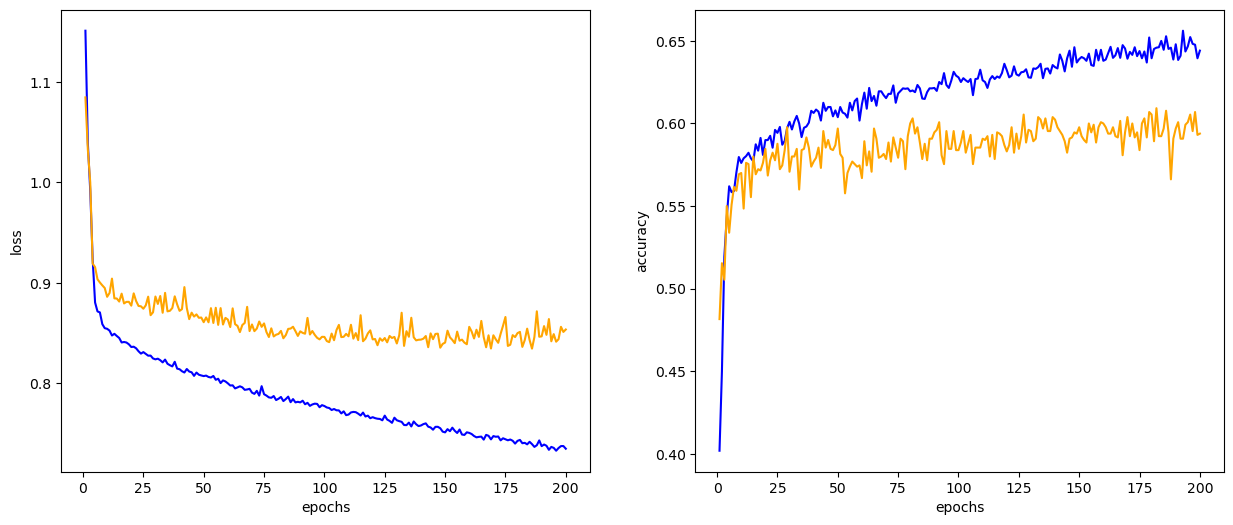

In [439]:
plot_history_cat(history_fus)

In [443]:
fus_test = model_fus.evaluate(X_fus_test_clean,y_fus_test_cat)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6108 - loss: 0.8221 


In [445]:
fus_test

[0.8221274018287659, 0.6107692122459412]